# Wellington Zone 1 Power Consumption ML Project
## By: Javier Huang | July 2025

# WELLINGTON ZONE 1 POWER CONSUMPTION & ENVIRONMENTAL FACTORS  

https://www.kaggle.com/datasets/younusmohamed/wellington-zone-1-power-consumption

Hourly data – 52 ,584 rows × 9 columns – 2019 to 2024

## 1.  CONTEXT & MOTIVATION
Balancing Wellington’s electric grid requires accurate short-term demand
forecasts. Weather, air-quality and cloud cover heavily influence how much
power Zone 1 draws each hour. This dataset merges six years of hourly load
measurements with local meteorological variables so analysts can:

• build regression / time-series / deep-learning models  
• measure which weather factors drive demand spikes  
• practise feature engineering, explainable AI and AutoML on real energy data  

## 2.  DATA AT A GLANCE
Rows    : 52 ,584  
Columns  : 9  
Time span : 1 Jan 2019 – 31 Dec 2024  
Frequency : hourly  
File size : ≈ 5 MB (Excel XLSX)

Spreadsheet file: City Power Consumption.xlsx
Sheet name: City Power Consumption

## 3.  COLUMN DICTIONARY
sr_no                    — Row index (1 … 52 ,584)  
temperature              — Ambient air temperature (°C)  
humidity                 — Relative humidity (% or g · m⁻³)  
wind_speed               — Wind speed (knots, i.e., nautical miles / hour)  
general_diffuse_flows    — Diffuse global solar irradiance (W · m⁻²)  
diffuse_flows            — Diffuse sky solar irradiance (W · m⁻²)  
air_quality_index        — Particulate-based AQI (µg · m⁻³)  
cloudiness               — 0 = clear, 1 = cloudy  
zone1_power_consumption  — Instantaneous power demand (kW)  ← TARGET

Note: kW values are instantaneous, **not** cumulative kWh.

## 4.  QUICK-START (PYTHON EXAMPLE)
```python
import pandas as pd

df = pd.read_excel('City Power Consumption.xlsx', sheet_name='City Power Consumption')

# optional: create lag features
for lag in [1, 24, 168]:           # 1 h, 1 day, 1 week
    df[f'power_lag_{lag}h'] = df['zone1_power_consumption'].shift(lag)

print(df.head())
```
## 5.  DATA QUALITY NOTES

• Duplicate timestamps (~0.3 %) were averaged.  
• 1.6 % missing power readings forward-filled (ffill).  
• All features aligned to the same hourly index.  
• Extreme outliers above the 99.9th percentile winsorised.  
• Units harmonised: wind in knots, irradiance in W · m⁻².

Feel free to re-impute or rescale as needed.

## 6.  LICENSE

Creative Commons Attribution 4.0 International (CC BY 4.0)  
Use, modify, and redistribute the data. Credit the sources below.

## 7.  SOURCE & ACKNOWLEDGEMENTS

• Wellington City Council Open Data Portal
• Transpower NZ – regional load statistics  
 
This dataset is not endorsed by either organisation; any errors are mine alone.

Happy forecasting!

## Import Libraries

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

## Preliminary Data Visualization

In [120]:
df = pd.read_excel('data/archive/City Power Consumption.xlsx', sheet_name='City Power Consumption')

In [121]:
df

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620
...,...,...,...,...,...,...,...,...,...
52578,52579,NaN,75.6,0.094,436.200,38.960,157.0,0,34444.55696
52579,52580,NaN,73.5,0.089,451.600,37.730,157.0,0,34438.48101
52580,52581,NaN,70.1,0.085,466.400,37.490,157.0,0,33873.41772
52581,52582,NaN,67.75,0.086,477.000,37.370,152.0,0,33988.86076


In [122]:
df.dtypes

S no                              int64
Temperature                      object
Humidity                         object
Wind Speed                      float64
general diffuse flows           float64
diffuse flows                   float64
Air Quality Index (PM)          float64
Cloudiness                        int64
 Power Consumption in A Zone    float64
dtype: object

In [123]:
df.isna().sum()

S no                              0
Temperature                     320
Humidity                         25
Wind Speed                       71
general diffuse flows           308
diffuse flows                    15
Air Quality Index (PM)           18
Cloudiness                        0
 Power Consumption in A Zone      0
dtype: int64

# Steps Breakdown

## 1. Problem Definition

Regression problem on the prediction of `Power Consumption in A Zone`

## 2. Data

The serial number represents the row, but at the same time, our data is time-series data taken at every hour, so an hour of day may be more useful. Since our target is the power consumption, this can vary greatly depending on the time of day (less at night, more at day), we need to add this into the data during our data enrichment.

Furthermore, for enrichment, lagging & rolling mean as well as cyclical time measurements would be useful as the power consumption fluctuates throughout the week and for every day.

Humidity and Wind Speed are strings, but they are numeric so they need to be converted.

There are missing values from a lot of the numeric columns.

## 3. Evaluation

> Can we predict the `Power Consumption in A Zone` with 95% R2 score?

## 4. Features

Features: `Temperature`, `Humidity`, `Wind Speed`, `general diffuse flows`, `diffuse flows`, `Air Quality Index (PM)`, and `Cloudiness`

## 5. Modeling

Use a variety of models, including `RandomForestRegressor`, `Ridge Regression`, `Linear SVR`

# Preliminary Data Processing Exploration

In [124]:
def load_raw():
    return pd.read_excel('data/archive/City Power Consumption.xlsx', sheet_name='City Power Consumption')

In [125]:
df = load_raw()

In [126]:
df.head(10)

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620
5,6,5.853,76.9,0.081,0.059,0.108,158.0,1,26624.81013
6,7,5.641,77.7,0.080,0.048,0.096,152.0,1,16993.31307
7,8,5.496,78.2,0.085,0.055,0.093,152.0,1,16661.39818
8,9,5.678,78.1,0.081,0.066,0.141,154.0,1,16227.35562
9,10,5.491,77.3,0.082,0.062,0.111,159.0,1,15939.20973


In [127]:
df.dtypes

S no                              int64
Temperature                      object
Humidity                         object
Wind Speed                      float64
general diffuse flows           float64
diffuse flows                   float64
Air Quality Index (PM)          float64
Cloudiness                        int64
 Power Consumption in A Zone    float64
dtype: object

In [128]:
df.isna().sum()

S no                              0
Temperature                     320
Humidity                         25
Wind Speed                       71
general diffuse flows           308
diffuse flows                    15
Air Quality Index (PM)           18
Cloudiness                        0
 Power Consumption in A Zone      0
dtype: int64

In [129]:
# Changing to numeric
df["Temperature"] = pd.to_numeric(df["Temperature"], errors="coerce")

In [130]:
df["Humidity"] = pd.to_numeric(df["Humidity"], errors="coerce")

In [131]:
df.dtypes

S no                              int64
Temperature                     float64
Humidity                        float64
Wind Speed                      float64
general diffuse flows           float64
diffuse flows                   float64
Air Quality Index (PM)          float64
Cloudiness                        int64
 Power Consumption in A Zone    float64
dtype: object

Before we add placeholders, we need to view the data itself

<Axes: >

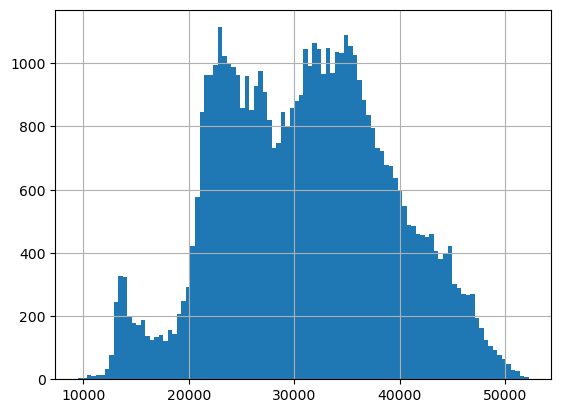

In [132]:
df[" Power Consumption in A Zone"].hist(bins=100)

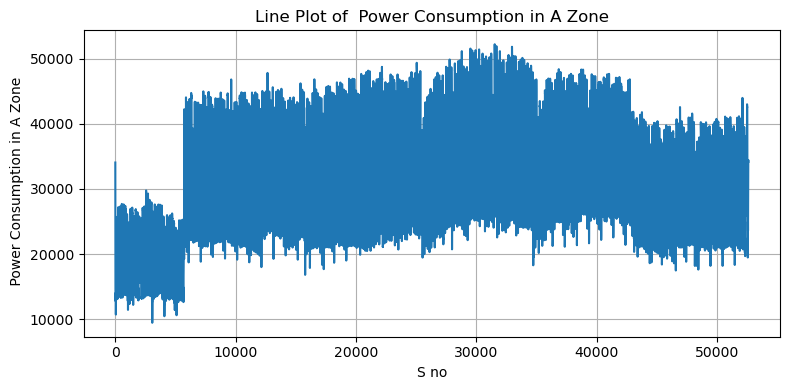

In [133]:
x_axis = "S no"
feature_to_plot = " Power Consumption in A Zone"

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(df[x_axis], df[feature_to_plot])

ax.set_title(f'Line Plot of {feature_to_plot}')
ax.set_xlabel(x_axis)
ax.set_ylabel(feature_to_plot)

ax.grid(True)
fig.tight_layout()

plt.show()

The data is time series and is very erratic. It would not be favourable to impute the data.

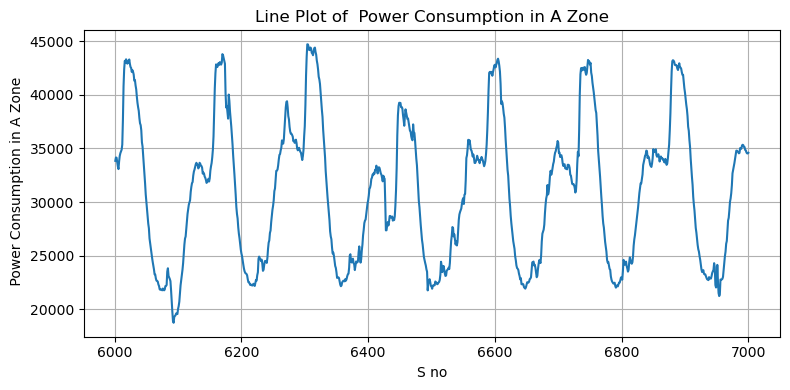

In [26]:
x_axis = "S no"
feature_to_plot = " Power Consumption in A Zone"
start = 6000
interval= 1000

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(df[x_axis][start:start + interval], df[feature_to_plot][start:start + interval])

ax.set_title(f'Line Plot of {feature_to_plot}')
ax.set_xlabel(x_axis)
ax.set_ylabel(feature_to_plot)

ax.grid(True)
fig.tight_layout()

plt.show()

We see that around **every week (168 hours)** there is some sort of cycle, and the values inside may be affected by the environmental factors. I would expect that the data is **very highly** affected by the lag or rolling mean features

In [27]:
df.drop('S no', axis=1, inplace=True)

In [28]:
df.isna().sum()

Temperature                     323
Humidity                         26
Wind Speed                       71
general diffuse flows           308
diffuse flows                    15
Air Quality Index (PM)           18
Cloudiness                        0
 Power Consumption in A Zone      0
dtype: int64

Note that cloudiness is a categorical feature (0 or 1)

It is also important that it is time-series data, that is hourly. Even though the serial numbers represent the time, it does not encode hour-of-day information that is necessary when it comes to power consumption

In [29]:
# Starts on Jan 1, 2019. Assume it starts at 12:00 AM
start_time = pd.to_datetime('2019-01-01 00:00')
df['timestamp'] = pd.date_range(start=start_time, periods=len(df), freq='h')
df['hour'] = df['timestamp'].dt.hour
# Monday=0
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

In [30]:
# The above will be deleted since they are not cyclical and may confuse linear models
# Cyclical ensures that there is better correlation
df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
df['dow_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
df['dow_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

In [31]:
# Add lagging and rolling mean, which can be high predictors as power does not fluctuate that quickly between time steps
# Also it is clear that we have ~ a weekly cycle
df['lag1'] = df[' Power Consumption in A Zone'].shift(1)
df['rolling_mean_3'] = df[' Power Consumption in A Zone'].shift(1).rolling(3).mean()

This is the reason why cos and sin are used, in order to create a circle of time
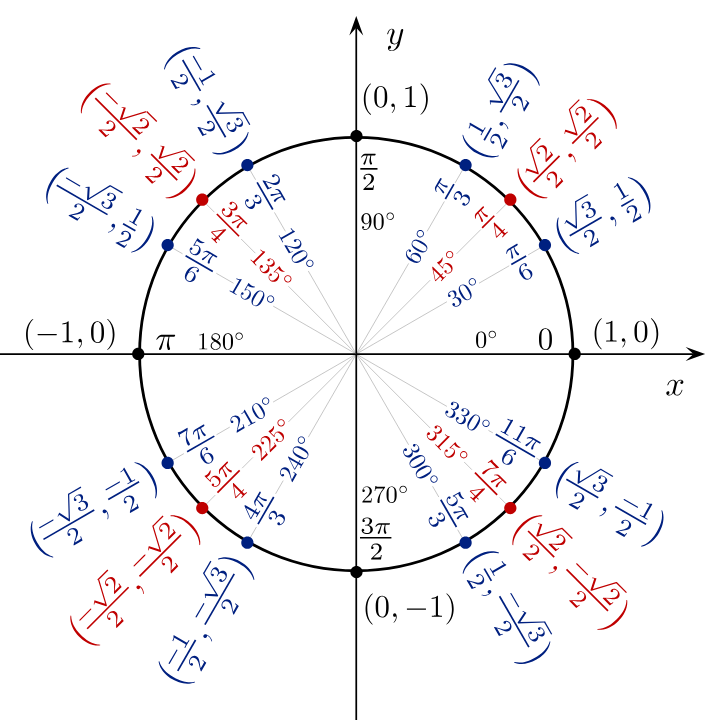

In [32]:
df.head()

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone,timestamp,hour,day_of_week,month,is_weekend,hour_sin,hour_cos,dow_sin,dow_cos,lag1,rolling_mean_3
0,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620,2019-01-01 00:00:00,0,1,1,0,0.000000,1.000000,0.781831,0.62349,NaN,NaN
1,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354,2019-01-01 01:00:00,1,1,1,0,0.258819,0.965926,0.781831,0.62349,34055.69620,NaN
2,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127,2019-01-01 02:00:00,2,1,1,0,0.500000,0.866025,0.781831,0.62349,29814.68354,NaN
3,6.121,75.0,0.083,0.091,0.096,151.0,1,28228.86076,2019-01-01 03:00:00,3,1,1,0,0.707107,0.707107,0.781831,0.62349,29128.10127,30999.49367
4,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620,2019-01-01 04:00:00,4,1,1,0,0.866025,0.500000,0.781831,0.62349,28228.86076,29057.21519


We now drop the columns `timestamp`

In [33]:
df.drop(columns=['timestamp'], inplace=True)

In [34]:
df.head(20)

,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone,hour,day_of_week,month,is_weekend,hour_sin,hour_cos,dow_sin,dow_cos,lag1,rolling_mean_3
0,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620,0,1,1,0,0.000000e+00,1.000000e+00,0.781831,0.62349,NaN,NaN
1,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354,1,1,1,0,2.588190e-01,9.659258e-01,0.781831,0.62349,34055.69620,NaN
2,6.313,74.5,0.080,0.062,0.100,151.0,1,29128.10127,2,1,1,0,5.000000e-01,8.660254e-01,0.781831,0.62349,29814.68354,NaN
3,6.121,75.0,0.083,0.091,0.096,151.0,1,28228.86076,3,1,1,0,7.071068e-01,7.071068e-01,0.781831,0.62349,29128.10127,30999.493670
4,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620,4,1,1,0,8.660254e-01,5.000000e-01,0.781831,0.62349,28228.86076,29057.215190
5,5.853,76.9,0.081,0.059,0.108,158.0,1,26624.81013,5,1,1,0,9.659258e-01,2.588190e-01,0.781831,0.62349,27335.69620,28230.886077
6,5.641,77.7,0.080,0.048,0.096,152.0,1,16993.31307,6,1,1,0,1.000000e+00,6.123234e-17,0.781831,0.62349,26624.81013,27396.455697
7,5.496,78.2,0.085,0.055,0.093,152.0,1,16661.39818,7,1,1,0,9.659258e-01,-2.588190e-01,0.781831,0.62349,16993.31307,23651.273133
8,5.678,78.1,0.081,0.066,0.141,154.0,1,16227.35562,8,1,1,0,8.660254e-01,-5.000000e-01,0.781831,0.62349,16661.39818,20093.173793
9,5.491,77.3,0.082,0.062,0.111,159.0,1,15939.20973,9,1,1,0,7.071068e-01,-7.071068e-01,0.781831,0.62349,16227.35562,16627.355623


# Pipeline Data Processing
Now that the data is prepared manually, we will make a method to prepare the data automatically using a pipeline and function

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin

In [36]:
lags = [1, 2, 3, 6, 12, 24, 48, 72, 168]
rolling_windows = [3, 6, 12, 24, 48, 168]

# Generate feature names
base_features = ['temperature', 'humidity', 'wind_speed', 'general_diffuse_flows', 
    'diffuse_flows', 'air_quality_index_pm', 'cloudiness', 'is_weekend']
lag_features = [f'lag_{lag}' for lag in lags]
rolling_features = [f'rolling_mean_{w}' for w in rolling_windows]
cyclic_features = ['hour_sin', 'hour_cos', 'dow_sin', 'dow_cos']

In [37]:
def prepare_data(df):
    """
    Prepare the data for the pipeline to consume.

    Drop unused columns, convert string to numeric, and add time series features for data enrichment.

    Parameters:
    - df: DataFrame of the data

    Returns the prepared DataFrame
    """
    
    # Drop the S no column
    df.drop("S no", axis=1, inplace=True)

    # More consistent columns
    df.rename(columns={
        'Temperature': 'temperature',
        'Humidity': 'humidity',
        'Wind Speed': 'wind_speed',
        'general diffuse flows': 'general_diffuse_flows',
        'diffuse flows': 'diffuse_flows',
        'Air Quality Index (PM)': 'air_quality_index_pm',
        'Cloudiness': 'cloudiness',
        ' Power Consumption in A Zone': 'power_consumption_a_zone'
    }, inplace=True)

    # Convert features to numeric
    df["temperature"] = pd.to_numeric(df["temperature"], errors="coerce")
    df["humidity"] = pd.to_numeric(df["humidity"], errors="coerce")

    # Drop null
    df.dropna(inplace=True)
    
    # Add time series features
    
    # Starts on Jan 1, 2019. Assume it starts at 12:00 AM
    start_time = pd.to_datetime('2019-01-01 00:00')
    df['timestamp'] = pd.date_range(start=start_time, periods=len(df), freq='h')
    df['hour'] = df['timestamp'].dt.hour
    # Monday=0
    df['day_of_week'] = df['timestamp'].dt.dayofweek
    df['month'] = df['timestamp'].dt.month
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

    # Cyclical ensures that there is better correlation
    df['hour_sin'] = np.sin(2 * np.pi * df['hour'] / 24)
    df['hour_cos'] = np.cos(2 * np.pi * df['hour'] / 24)
    df['dow_sin'] = np.sin(2 * np.pi * df['day_of_week'] / 7)
    df['dow_cos'] = np.cos(2 * np.pi * df['day_of_week'] / 7)

    for lag in lags:
        df[f'lag_{lag}'] = df['power_consumption_a_zone'].shift(lag)
    for window in rolling_windows:
        df[f'rolling_mean_{window}'] = df['power_consumption_a_zone'].shift(1).rolling(window=window).mean()

    df.dropna(subset=lag_features + rolling_features, inplace=True)

    # Drop incorrect or non-cyclical columns
    drop_features = ['timestamp', 'hour', 'day_of_week', 'month']
    df.drop(columns=drop_features, inplace=True, errors='ignore')

    return df

In [38]:
def create_pipeline(model):
    categorical_features = ["cloudiness"]
    categorical_transformer = Pipeline(
        steps = [
            ('imputer', SimpleImputer(strategy="most_frequent", add_indicator=False)),
            ('onehot', OneHotEncoder(handle_unknown="ignore"))
        ]
    )
    
    numeric_features = [
        "temperature",
        "humidity",
        "wind_speed",
        "general_diffuse_flows",
        "diffuse_flows",
        "air_quality_index_pm",
        "is_weekend"
    ]
    numeric_transformer = Pipeline(
        steps = [
            # ('imputer', SimpleImputer(strategy="median", add_indicator=False)),
            ('scaler', StandardScaler())
        ]
    )

    preprocessor = ColumnTransformer(
        transformers = [
            ("categorical", categorical_transformer, categorical_features),
            ("numeric", numeric_transformer, numeric_features)
        ],
        remainder='passthrough'
    )

    return Pipeline(
        steps = [
            ("preprocessor", preprocessor),
            ("model", model)
        ]
    )

# Create train, test, and validation splits

## Setup Data

In [39]:
def get_X_y(df):
    return df.drop("power_consumption_a_zone", axis=1), df["power_consumption_a_zone"]

In [40]:
# Set up data
df = load_raw()

In [41]:
df.shape

(52583, 9)

In [42]:
df = prepare_data(df)
X, y = get_X_y(df)

In [43]:
df.shape

(51975, 28)

In [44]:
df

,temperature,humidity,wind_speed,general_diffuse_flows,diffuse_flows,air_quality_index_pm,cloudiness,power_consumption_a_zone,is_weekend,hour_sin,...,lag_24,lag_48,lag_72,lag_168,rolling_mean_3,rolling_mean_6,rolling_mean_12,rolling_mean_24,rolling_mean_48,rolling_mean_168
180,9.580,84.5,0.075,0.048,0.134,157.0,1,15089.36170,0,0.000000e+00,...,14294.22492,24000.00000,24455.92705,34055.69620,14199.392100,13910.638298,13579.635258,13615.349544,16194.148936,17421.073998
181,9.440,84.1,0.075,0.070,0.145,150.0,1,14961.70213,0,2.588190e-01,...,14057.14286,23872.34043,24463.22188,29814.68354,14617.629180,14172.644377,13746.200607,13648.480243,16008.510638,17308.179150
182,9.400,84.4,0.077,0.070,0.122,156.0,1,15176.89970,0,5.000000e-01,...,13823.70821,23306.99088,24000.00000,29128.10127,14919.148937,14397.568390,13891.489361,13686.170213,15822.872340,17219.768546
183,9.380,84.6,0.076,0.044,0.141,152.0,1,15545.28875,0,7.071068e-01,...,13783.58663,22975.07599,24251.67173,28228.86076,15075.987843,14637.689972,14056.534954,13742.553192,15653.495441,17136.725680
184,9.160,84.7,0.077,0.048,0.145,152.0,1,15749.54407,0,8.660254e-01,...,13608.51064,22489.96960,24401.21581,27335.69620,15227.963527,14922.796353,14245.288753,13815.957447,15498.708207,17061.228227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52411,7.010,72.4,0.080,0.040,0.096,153.0,0,31160.45627,0,5.000000e-01,...,37694.29658,28921.67300,30174.90494,38692.01521,32786.818757,33533.079848,34326.996198,35737.896071,34202.027884,29336.375158
52412,6.947,72.6,0.082,0.051,0.093,153.0,0,30430.41825,0,2.588190e-01,...,37682.12928,29019.01141,30381.74905,38485.17110,32044.613433,32936.882128,33937.642585,35465.652725,34248.669202,29291.544450
52413,6.900,72.8,0.086,0.084,0.074,157.0,0,29590.87452,0,1.224647e-16,...,37548.28897,28848.66920,30758.93536,38436.50190,31249.683140,32287.959442,33505.703422,35163.498098,34278.073511,29243.599493
52414,6.758,73.0,0.080,0.066,0.089,150.0,0,28958.17490,0,-2.588190e-01,...,37280.60837,28641.82510,30734.60076,38059.31559,30393.916347,31590.367552,33030.164765,34831.939163,34293.536122,29190.946949


## Componentized Train Test Validation Split
This is done for *time series data* so it cannot be shuffled

In [45]:
def train_test_val_split(X, y, train_size=0.6, val_size=0.2, test_size=0.2):
    """
    Splits the dataset into train, validation, and test sets with fixed proportions, preserving time order.
    """
    assert abs(train_size + val_size + test_size - 1.0) < 1e-6, "Splits must sum to 1.0"

    total_len = len(X)
    train_end = int(total_len * train_size)
    val_end = train_end + int(total_len * val_size)

    X_train = X.iloc[:train_end]
    y_train = y.iloc[:train_end]

    X_val = X.iloc[train_end:val_end]
    y_val = y.iloc[train_end:val_end]

    X_test = X.iloc[val_end:]
    y_test = y.iloc[val_end:]

    return X_train, X_val, X_test, y_train, y_val, y_test

# Testing on Different Models

## Preliminary Test

In [46]:
# X_train, X_test, X_val, y_train, y_test, y_val = train_test_val_split(X, y)

In [47]:
# X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((41580, 27), (10395, 27), (41580,), (10395,))

In [50]:
X_train

,temperature,humidity,wind_speed,general_diffuse_flows,diffuse_flows,air_quality_index_pm,cloudiness,is_weekend,hour_sin,hour_cos,...,lag_24,lag_48,lag_72,lag_168,rolling_mean_3,rolling_mean_6,rolling_mean_12,rolling_mean_24,rolling_mean_48,rolling_mean_168
180,9.58,84.5,0.075,0.048,0.134,157.0,1,0,0.000000,1.000000,...,14294.22492,24000.00000,24455.92705,34055.69620,14199.392100,13910.638298,13579.635258,13615.349544,16194.148936,17421.073998
181,9.44,84.1,0.075,0.070,0.145,150.0,1,0,0.258819,0.965926,...,14057.14286,23872.34043,24463.22188,29814.68354,14617.629180,14172.644377,13746.200607,13648.480243,16008.510638,17308.179150
182,9.40,84.4,0.077,0.070,0.122,156.0,1,0,0.500000,0.866025,...,13823.70821,23306.99088,24000.00000,29128.10127,14919.148937,14397.568390,13891.489361,13686.170213,15822.872340,17219.768546
183,9.38,84.6,0.076,0.044,0.141,152.0,1,0,0.707107,0.707107,...,13783.58663,22975.07599,24251.67173,28228.86076,15075.987843,14637.689972,14056.534954,13742.553192,15653.495441,17136.725680
184,9.16,84.7,0.077,0.048,0.145,152.0,1,0,0.866025,0.500000,...,13608.51064,22489.96960,24401.21581,27335.69620,15227.963527,14922.796353,14245.288753,13815.957447,15498.708207,17061.228227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42004,21.53,76.8,4.916,103.300,90.300,154.0,0,0,0.965926,-0.258819,...,37376.98031,30262.05689,25573.39168,37080.78775,35345.645513,35399.212253,35219.080963,35847.702407,35274.748359,33990.084401
42005,21.37,77.3,4.918,76.200,64.250,152.0,0,0,0.866025,-0.500000,...,36942.14442,30772.51641,25686.82713,36400.17505,35154.485777,35400.262582,35138.730853,35746.608315,35372.428884,33977.405439
42006,21.41,77.8,4.923,102.400,74.200,159.0,0,0,0.707107,-0.707107,...,36551.42232,31938.38074,26537.59300,36677.46171,34952.822757,35244.814003,35060.481401,35656.017505,35455.667396,33967.689903
42007,21.36,78.5,4.919,152.800,87.800,150.0,0,0,0.500000,-0.866025,...,36633.34792,32429.93435,26928.31510,36463.19475,34770.065647,35057.855580,35046.301970,35574.354486,35510.940919,33955.273523


### RandomForestRegressor

In [43]:
from sklearn.ensemble import RandomForestRegressor
rf_pipeline = create_pipeline(RandomForestRegressor(random_state=42))

In [44]:
rf_pipeline.fit(X_train, y_train)

C:\DuDu\Apps\AI\wellington-zone1-power-prediction-project\env\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cloudiness']),
                                                 ('numeric',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['temperature', 'humidity',
                                                   'wind_speed',
                                                   'general_diffuse_flows',
                                                   'diffuse_flows',
                                                   'air_quality_index_pm',
                                                   'is_weekend'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [45]:
rf_train_score = rf_pipeline.score(X_train, y_train)
rf_train_score

0.9996943901213875

In [46]:
# rf_val_score = rf_pipeline.score(X_val, y_val)
# rf_val_score

In [47]:
rf_test_score = rf_pipeline.score(X_test, y_test)
rf_test_score

0.9959818754064353

## Componentized Training and Evalution of Model

In [80]:
# Feature set dictionary
feature_sets = {
    'base only': base_features,
    'base + lag_1': base_features + ['lag_1'],
    'base + lags': base_features + lag_features,
    'base + lags + rolling': base_features + lag_features + rolling_features,
    'base + lags + rolling + cyclic (full)': base_features + lag_features + rolling_features + cyclic_features,
}

feature_sets_sm = {
    'base + lags + rolling + cyclic (full)': base_features + lag_features + rolling_features + cyclic_features,
}

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def train_evaluate_pipeline(df, features, pipeline, target='power_consumption_a_zone'):
    """
    Train and evaluate a pipeline based on a feature set
    """
    X = df[features]
    y = df[target]

    # Keeping temporal order without shuffle
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=False
    )

    pipeline.fit(X_train, y_train)

    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)

    train_score = r2_score(y_train, y_train_pred)
    test_score = r2_score(y_test, y_test_pred)

    return train_score, test_score

In [84]:
def get_pipeline_evaluation(pipeline, chosen_feature_sets = feature_sets):
    """
    Train and evaluate a pipeline based on every set of features in the feature set
    """
    results = {}

    for name, features in chosen_feature_sets.items():
        train_r2, test_r2 = train_evaluate_pipeline(df, features, pipeline)
        results[name] = {'train_r2': train_r2, 'test_r2': test_r2}
        print(f"{name}: Train R2={train_r2:.6f}, Test R2={test_r2:.6f}")

    return results

### Random Forest Regressor

**Test 1 - With cyclic features (i.e. hour_sin)**

- lag_1 only: Train R2=0.9971, Test R2=0.9882
- lag_1 + lag_24: Train R2=0.9992, Test R2=0.9915
- lag_1 + lag_168: Train R2=0.9992, Test R2=0.9913
- lags only: Train R2=0.9997, Test R2=0.9957
- rolling only: Train R2=0.9995, Test R2=0.9908
- lags + rolling: Train R2=0.9997, Test R2=0.9958
- lags + cyclic: Train R2=0.9994, Test R2=0.9909
- rolling + cyclic: Train R2=0.9995, Test R2=0.9896
- lags + rolling + cyclic: Train R2=0.9997, Test R2=0.9955
- all numeric: Train R2=0.9997, Test R2=0.9929
- full feature set: Train R2=0.9997, Test R2=0.9961

From what is seen, cyclic features actually seem to clash with the lag features

**Test 2 - Without cyclic features**
- lag_1 only (hour): Train R2=0.9971, Test R2=0.9881
- lag_1 + lag_24 (day): Train R2=0.9992, Test R2=0.9915
- lag_1 + lag_168 (week - Most noticeable cycle period): Train R2=0.9992, Test R2=0.9912
- lag_1 + lag_24 + lag_168: Train R2=0.9993, Test R2=0.9917
- lags only: Train R2=0.9997, Test R2=0.9956
- rolling only: Train R2=0.9995, Test R2=0.9907
- lags + rolling: Train R2=0.9997, Test R2=0.9959
- full feature set: Train R2=0.9997, Test R2=0.9960

**Test 3 - Base Features included (final model)**

- base only: Train R2=0.9601, Test R2=-0.3575
- base + lag_1: Train R2=0.9995, Test R2=0.9927
- base + lags: Train R2=0.9997, Test R2=0.9959
- base + lags + rolling: Train R2=0.9997, Test R2=0.9960
- base + lags + rolling + cyclic (full): Train R2=0.9997, Test R2=0.9959

*Total time:*
- CPU times: total: 6min 56s
- Wall time: 7min 10s

We see serious overfitting (large discrepancy) when it comes to simply using the base features, so the lag features help to provide the time-series part of it. It is clear that the base features provide boosting to the R^2 score.

From the decision tree, it seems as if cyclic features may be hindering progress.

In [2]:
from joblib import dump, load

In [67]:
%%time
from sklearn.ensemble import RandomForestRegressor
rf_pipeline = create_pipeline(RandomForestRegressor(random_state=42))
# rf_pipeline = load('rf_pipeline.joblib')
rf_results = get_pipeline_evaluation(rf_pipeline)

base only: Train R2=0.9601, Test R2=-0.3575
base + lag_1: Train R2=0.9995, Test R2=0.9927
base + lags: Train R2=0.9997, Test R2=0.9959
base + lags + rolling: Train R2=0.9997, Test R2=0.9960
base + lags + rolling + cyclic (full): Train R2=0.9997, Test R2=0.9959
CPU times: total: 6min 56s
Wall time: 7min 10s


In [53]:
dump(rf_pipeline, 'rf_pipeline.joblib')
dump(rf_results, 'rf_results.joblib')

['rf_results.joblib']

#### Feature Importances

Text(0.5, 1.0, 'Feature Importances')

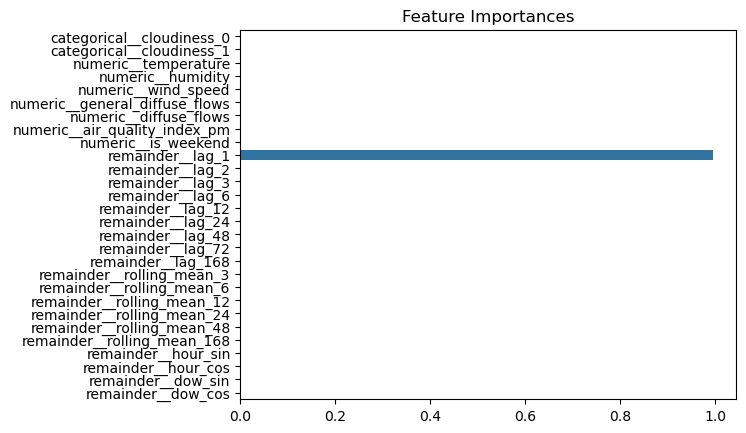

In [54]:
import seaborn as sns

features = rf_pipeline.named_steps['model'].feature_importances_
names = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

sns.barplot(x=features, y=names)
plt.title("Feature Importances")

### Ridge Regression

**Test 1 - Initial testing**

This test was erronous as the model actually had cyclic features

- lag_1 only (hour): Train R2=0.9942, Test R2=0.9920
- lag_1 + lag_24 (day): Train R2=0.9948, Test R2=0.9933
- lag_1 + lag_168 (week - Most noticeable cycle period): Train R2=0.9948, Test R2=0.9932
- lag_1 + lag_24 + lag_168: Train R2=0.9948, Test R2=0.9933
- lags only: Train R2=0.9970, Test R2=0.9961
- rolling only: Train R2=0.9924, Test R2=0.9887
- lags + rolling: Train R2=0.9971, Test R2=0.9962
- full feature set: Train R2=0.9971, Test R2=0.9963

**Test 2 - Base Features**

- base only: Train R2=0.3483, Test R2=0.0085
- base + lag_1: Train R2=0.9945, Test R2=0.9922
- base + lags: Train R2=0.9970, Test R2=0.9961
- base + lags + rolling: Train R2=0.9971, Test R2=0.9963
- base + lags + rolling + cyclic (full): Train R2=0.9971, Test R2=0.9963

*Total time:*
- CPU times: total: 1.8 s
- Wall time: 546 ms

Once again, base features on their own has high overfitting, but it is evident that it provides some boost combined with the time-series features. Cyclic features do not seem to affect the eval results, but seem to have some feature importance.

In [68]:
%%time
from sklearn.linear_model import Ridge
ridge_pipeline = create_pipeline(Ridge())
ridge_results = get_pipeline_evaluation(ridge_pipeline)

base only: Train R2=0.3483, Test R2=0.0085
base + lag_1: Train R2=0.9945, Test R2=0.9922
base + lags: Train R2=0.9970, Test R2=0.9961
base + lags + rolling: Train R2=0.9971, Test R2=0.9963
base + lags + rolling + cyclic (full): Train R2=0.9971, Test R2=0.9963
CPU times: total: 1.8 s
Wall time: 546 ms


Text(0.5, 1.0, 'Feature Importances')

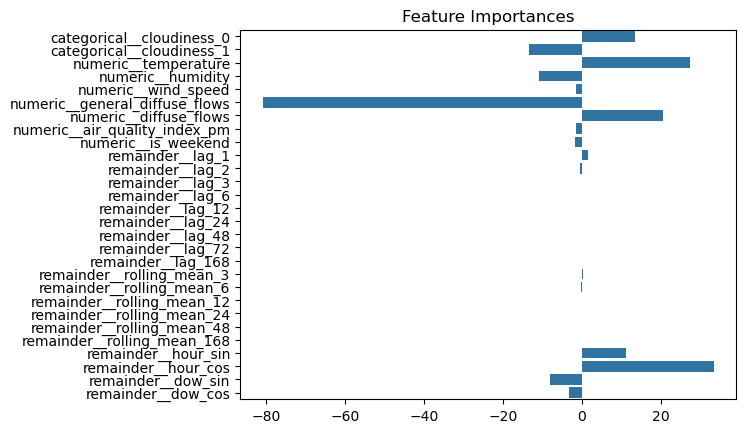

In [56]:
import seaborn as sns

features = ridge_pipeline.named_steps['model'].coef_
names = ridge_pipeline.named_steps['preprocessor'].get_feature_names_out()

sns.barplot(x=features, y=names)
plt.title("Feature Importances")

In [57]:
dump(ridge_pipeline, 'ridge_pipeline.joblib')
dump(ridge_results, 'ridge_results.joblib')

['ridge_results.joblib']

### SVR Linear
SVR(kernel="linear") takes too long to run. We use SVRLinear instead. Without changing max_iter, there is a warning that the model has not enough iterations. Increasing iterations raises the R^2 score. Currently 10000 iterations seems to prevent overfitting.

**Test 1 - `max_iter=10000`**

- base only: Train R2=0.1055, Test R2=-0.3839
- base + lag_1: Train R2=0.9898, Test R2=0.9846
- base + lags: Train R2=0.9952, Test R2=0.9933
- base + lags + rolling: Train R2=0.9962, Test R2=0.9949
- base + lags + rolling: Train R2=0.9962, Test R2=0.9949

*Total time*
- CPU times: total: 6min 22s
- Wall time: 6min 29s

In [69]:
%%time
from sklearn.svm import LinearSVR
svr_linear_pipeline = create_pipeline(LinearSVR(max_iter=10000))
svr_linear_results = get_pipeline_evaluation(svr_linear_pipeline, feature_sets)

base only: Train R2=0.1043, Test R2=-0.3859


C:\DuDu\Apps\AI\wellington-zone1-power-prediction-project\env\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


base + lag_1: Train R2=0.9941, Test R2=0.9917


C:\DuDu\Apps\AI\wellington-zone1-power-prediction-project\env\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


base + lags: Train R2=0.9946, Test R2=0.9924


C:\DuDu\Apps\AI\wellington-zone1-power-prediction-project\env\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


base + lags + rolling: Train R2=0.9941, Test R2=0.9916
base + lags + rolling + cyclic (full): Train R2=0.9944, Test R2=0.9921
CPU times: total: 6min 22s
Wall time: 6min 29s


C:\DuDu\Apps\AI\wellington-zone1-power-prediction-project\env\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [63]:
dump(svr_linear_pipeline, 'svr_linear_pipeline.joblib')
dump(svr_linear_results, 'svr_linear_results.joblib')

['svr_linear_results.joblib']

## Cross Validation for Time Series Data
Since all three models performed very well, yet Ridge Regression is not only the fastest but also the most accurate out of the initial testing, we will perform cross validation through grid search

In [72]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=5)

# Parameters to test for Ridge. We use an extensive list due to Ridge being a very fast model (see times)
param_grid = {
    'model__alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1],
    'model__solver': ['auto', 'svd', 'saga'],
    'model__fit_intercept': [True],
    'model__max_iter': [10000],
    'model__tol': [1e-4, 1e-5],
    'model__positive': [False],
}

grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=tscv, scoring='r2', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


C:\DuDu\Apps\AI\wellington-zone1-power-prediction-project\env\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['cloudiness']),
                                                                        ('numeric',
                                                                         Pipel...
                                                                          'humidity',
                                                                          'wind_speed',
                                                                          'general_diffuse_flows',
                                                                          'diffuse_flows',
                                                                          'air_quality_index_pm',
                                                                          'is_weekend'])])),
                                       ('model', Ridge())]),
             n_jobs=-1,
             param_grid={'model__alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                         'model__fit_intercept': [True],
                         'model__max_iter': [10000], 'model__positive': [False],
                         'model__solver': ['auto', 'svd', 'saga'],
                         'model__tol': [0.0001, 1e-05]},
             scoring='r2', verbose=2)

**Best params:**

- 'model__alpha': 1
- 'model__fit_intercept': True
- 'model__max_iter': 10000
- 'model__positive': False
- 'model__solver': 'svd'
- 'model__tol': 0.0001

In [74]:
grid_search.best_params_

{'model__alpha': 1,
 'model__fit_intercept': True,
 'model__max_iter': 10000,
 'model__positive': False,
 'model__solver': 'svd',
 'model__tol': 0.0001}

**Best cross-validated score:**
0.9954548377759986

In [75]:
grid_search.best_score_

np.float64(0.9954548377759986)

Let's fit on our own train test split

In [103]:
from sklearn.linear_model import Ridge
tuned_ridge_pipeline = create_pipeline(Ridge(alpha=1,fit_intercept=True,max_iter=10000,positive=False,solver='svd',tol=0.0001))

**Results of tuned model**
- base only: Train R2=0.348336, Test R2=0.008491
- base + lag_1: Train R2=0.994464, Test R2=0.992180
- base + lags: Train R2=0.997004, Test R2=0.996108
- base + lags + rolling: Train R2=0.997094, Test R2=0.996277
- base + lags + rolling + cyclic (full): Train R2=0.997103, Test R2=0.996265

*Time taken*
- CPU times: total: 1.72 s
- Wall time: 483 ms

In [104]:
%%time
tuned_ridge_results = get_pipeline_evaluation(tuned_ridge_pipeline)

base only: Train R2=0.348336, Test R2=0.008491
base + lag_1: Train R2=0.994464, Test R2=0.992180
base + lags: Train R2=0.997004, Test R2=0.996108
base + lags + rolling: Train R2=0.997094, Test R2=0.996277
base + lags + rolling + cyclic (full): Train R2=0.997103, Test R2=0.996265
CPU times: total: 1.86 s
Wall time: 500 ms


Side by side comparison to untuned model

**Results of untuned model**
- base only: Train R2=0.348336, Test R2=0.008491
- base + lag_1: Train R2=0.994464, Test R2=0.992180
- base + lags: Train R2=0.997004, Test R2=0.996108
- base + lags + rolling: Train R2=0.997094, Test R2=0.996277
- base + lags + rolling + cyclic (full): Train R2=0.997103, Test R2=0.996265

*Time taken*
- CPU times: total: 1.33 s
- Wall time: 382 ms

In [102]:
%%time
ridge_results = get_pipeline_evaluation(ridge_pipeline)

base only: Train R2=0.348336, Test R2=0.008491
base + lag_1: Train R2=0.994464, Test R2=0.992180
base + lags: Train R2=0.997004, Test R2=0.996108
base + lags + rolling: Train R2=0.997094, Test R2=0.996277
base + lags + rolling + cyclic (full): Train R2=0.997103, Test R2=0.996265
CPU times: total: 1.33 s
Wall time: 382 ms


Our final model will still be the untuned model, as it is faster in both CPU and Wall times but has the same scores as the tuned model

## Residuals

In [108]:
import scipy.stats as stats

def plot_residuals(y_true, y_pred, show_qq=False):
    """
    Plots residual diagnostics: Residuals vs Predicted and Histogram of Residuals.

    Parameters:
    - y_true: Actual target values (array-like)
    - y_pred: Predicted target values (array-like)
    - show_qq: If True, also plot QQ plot
    """
    residuals = y_true - y_pred

    plt.figure(figsize=(14, 5))

    # Residuals vs. Predicted
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=y_pred, y=residuals)
    plt.axhline(0, color='red', linestyle='--')
    plt.xlabel("Predicted Values")
    plt.ylabel("Residuals")
    plt.title("Residuals vs Predicted")

    # Histogram of Residuals
    plt.subplot(1, 2, 2)
    sns.histplot(residuals, bins=30, kde=True)
    plt.title("Histogram of Residuals")
    plt.xlabel("Residuals")

    plt.tight_layout()
    plt.show()

    if show_qq:
        plt.figure(figsize=(6, 6))
        stats.probplot(residuals, dist="norm", plot=plt)
        plt.title("QQ Plot of Residuals")
        plt.show()

In [63]:
y_preds_ridge = ridge_pipeline.predict(X_test)

In [65]:
ridge_pipeline.score(X_test,y_test)

0.9962646360060744

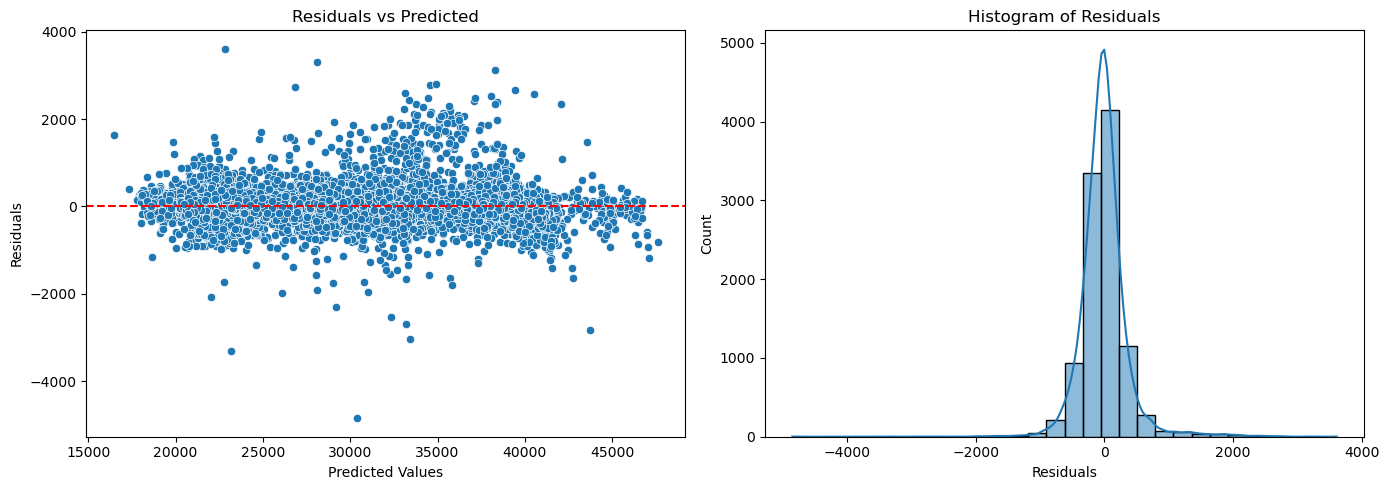

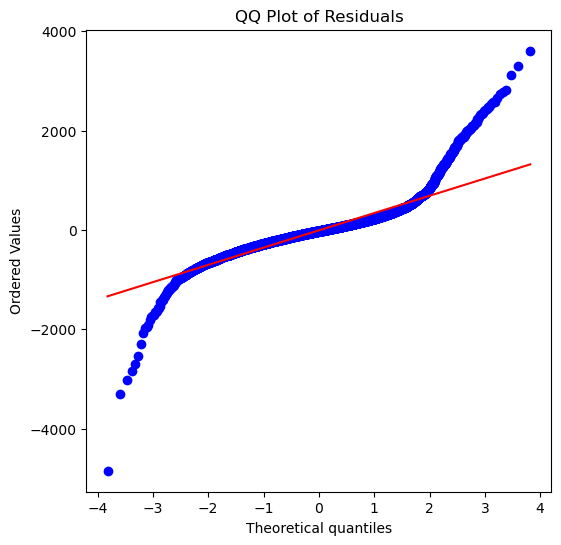

In [64]:
plot_residuals(y_test, y_preds_ridge, True)

The residuals are approximately normally distributed and centered around zero, with no strong patterns in the residuals vs. predicted plot, indicating acceptable model fit.
However, the Q-Q plot shows deviations in the tails, suggesting possible outliers or heavy-tailed errors.

In [110]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

def score_pipeline(pipeline, X, y_true):
    """
    Scores the pipeline on many metrics
    """
    y_pred = pipeline.predict(X)
    
    # Calculate R^2
    r2 = r2_score(y_true, y_pred)
    
    # Calculate MSE
    mse = mean_squared_error(y_true, y_pred)
    
    # Calculate RMSE (square root of MSE)
    rmse = np.sqrt(mse)
    
    # Calculate MAE
    mae = mean_absolute_error(y_true, y_pred)
    
    # Return all metrics as a dictionary
    return {
        'R2': r2,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae
    }

In [111]:
ridge_score = score_pipeline(ridge_pipeline, X_test, y_test)

In [112]:
ridge_score

{'R2': 0.9962646360060744,
 'MSE': 142240.22932181013,
 'RMSE': np.float64(377.1474901438562),
 'MAE': 241.25686234346747}

We need to emphasize the scale of our data and what these metrics mean in relation to them. R2 is not affected.

In [117]:
df["power_consumption_a_zone"].mean(), df["power_consumption_a_zone"].median(), df["power_consumption_a_zone"].std(), df["power_consumption_a_zone"].var()

(np.float64(31156.963280493637),
 31263.87833,
 7977.919764324004,
 63647203.765991576)

The model explains over 99.6% of the variance in power consumption (R² = 0.996), indicating an excellent fit. Despite the large scale of the data, the RMSE of about 377 and MAE around 241 show that the average prediction errors are relatively small compared to the mean consumption (~31,157), confirming the model’s strong predictive performance.

# Conclusion

We have reached our initial goal of:

> Can we predict the `Power Consumption in A Zone` with 95% R2 score?

Having reached **0.9963** R2 score, we have surpassed our initial expectations.

Taking advantage of lag, rolling, and cyclical features in time series data allows us to boost our model performance significantly.